## Scientific Computing with Python: Getting familiar with ```numpy```, ```scipy``` and ```scikit-learn``` for data analysis.

### Exercise 1: Manipulating an image with ```scikit-image```

Load the Immunohistochemistry (IHC) example image stored in `im_path`. We are going to try and extract the blue-stained cell nuclei and then perform a crude binary segmentation on them. This is a very typical problem in cell biology image processing.

We have included all the required imports from `skimage` that you should need. The steps are as follows:

1. Perform a color unmixing to get the Haematoxylin-Eosin-DAB (HED) channels, and store the image containing the nuclei in a variable.
1. Do a gaussian blurring to ensure smooth boundaries for our segmentation.
1. Apply an Otsu threshold to segment based on the image intensities, producing a binary image. You will need to use some [comparison operator](https://www.w3schools.com/python/gloss_python_comparison_operators.asp), can you guess which one?
1. Plot your final `nuclei_mask` using `pyplot`.

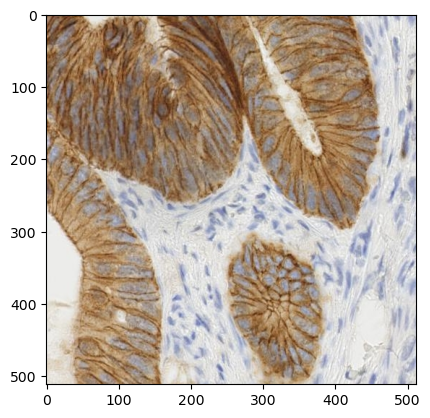

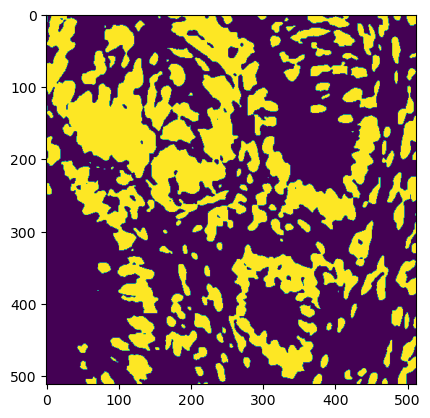

In [ ]:
im_path = "../datasets/images/ihc.png"

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hed
from skimage.filters import gaussian, threshold_otsu

# load the image using the appropriate function. call it "im"
im = ...
plt.imshow(im)

# perform RGB to Haematoxylin-Eosin-DAB (HED) color unmixing

# take only the nuclei channel and store it in a variable "nuclei"

# blur the nuclei

# apply an otsu threshold to create a binary mask. call the binary image "nuclei_mask"
nuclei_mask = ...

plt.figure()
plt.imshow(nuclei_mask)

### Exercise 2: Statistical analysis with `scipy`

Here we have loaded the <b>Iris dataset</b> from <a href="https://scikit-learn.org/1.5/datasets/toy_dataset.html">scikit-learn</a>. The data is loaded in a machine-learning friendly format: ```pd.DataFrame```. We view the first few entries using ```df.head()```. You will use this data to explore the power of `scipy` for statistical analysis.

In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# load the data
iris = load_iris(as_frame=True)

X = iris['data']
y = iris['target']
# one-hot encode
y = pd.get_dummies(y)

display(X.head())
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


##### Exercise 2.1: Summarize your data statistics.

Use either ```numpy```, ```scipy``` or ```pandas``` to statistically summarize the classes in your data by computing the `mean` and `standard deviation`. Do it for all features, if there is more than one. Summarize the results in a ```pd.DataFrame```.

In [ ]:
means = []
stds = []

# here, write some code to take the .mean and .std of all of your X data
# store in "means" and "stds"


# means
display(pd.DataFrame(means))

# standard deviations
display(pd.DataFrame(stds))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.352490,0.379064,0.173664,0.105386
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650


##### Exercise 2.2: Perform a significance test using your dataset.

Choose an interesting feature from your dataset and use ```scipy``` to perform a signicance test to determine if there is a significant difference between your classes/targets. For bonus points, select a good plot from ```seaborn``` and visualize the data.

We have chosen a test for you in the `imports`... Why did we chose this one?

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)


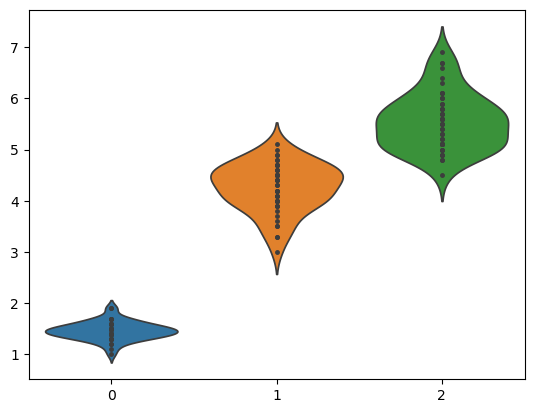

In [ ]:
import seaborn as sns
from scipy.stats import f_oneway

# look at your stats to select a feature which you think could demonstrate a significant difference between flowers
feature = "..."

# preparing the 3 datasets to use in our test for the selected feature 
v0 = X[feature].values[y[0]]
v1 = X[feature].values[y[1]]
v2 = X[feature].values[y[2]]

# plotting our data. what do you think will be the result of our test?
sns.violinplot(data=[v0, v1, v2], inner='point')

# perform the test here:
result = ...

print(result)

### Exercise 3: Use Machine Learning in `scikit-learn` to do a Binary Classification

Binary Classifications are classifications with only two classes as targets: True/False, Positive/Negative, Malignant/Benign, etc. 

We have loaded the <b>Breast cancer wisconsin (diagnostic) dataset</b> from ```scikit-learn``` as a good example. This dataset is more intereting than Iris from a Machine Learning perspective, as it has a binary class output of malignant/benign and a decent number of patients and features for us to work with.

Following convention, **Features** and **Targets** are stored in the variables `X` and `y`, respectively. You will use these as inputs/outputs for your ML model. We will do some <b>data visualization</b>: a critical step in ML to determine if classes even exist in your high dimensional data. Finally, we do proper train/test splitting to test how good your model performs in predicting malignant/benign.

In [67]:
from sklearn.datasets import load_breast_cancer

# load the data
dataset = load_breast_cancer(as_frame=True)

X = dataset['data']
y = dataset['target']

display(X.head())
display(y.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

#### Exercise 3.1: Visualize the data using Dimensionality Reduction

Data visualization is critical to determining how to move forward in any machine learning task. However, high-dimensional data like we have here is difficult, if not impossible, to visualize. 

Below we have taken our high-dimensional data and reduced it to 2-dimensions using <a href="https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html">Principle Component Analysis (PCA)</a>. If we plot the result and label based on our known targets, we can see if two groups exist within the data or not. Run the code: does it look like a nice binary classification problem, or not?

PCA is kind of outdated, and isn't the best method for visualizing clusters. A more modern technique is <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html">t-distributed Stochastic Neighbor Embedding (tSNE)</a>.

Implement tSNE to reduce the data to 2-dimensions. How does our outlook for binary classification look now?

#### Do you think there exists, somewhere in your data, two distinct classes that an ML model can suss out?

Text(0.5, 1.0, 'PCA')

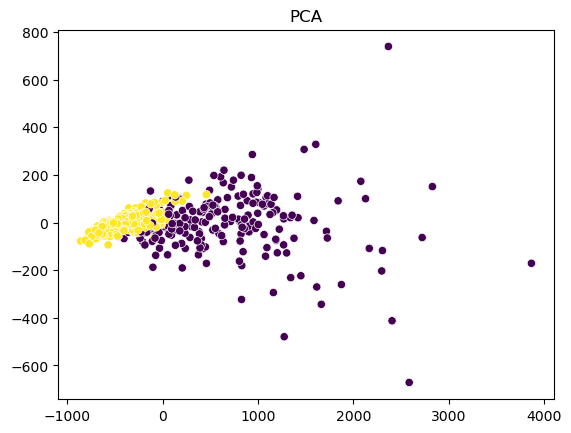

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for n_components=2 on X
# store the result in small x

x_pca = ...

# plotting our data. Is there class separation?
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], markers='.', c=y)
plt.title("PCA")


Text(0.5, 1.0, 'tSNE')

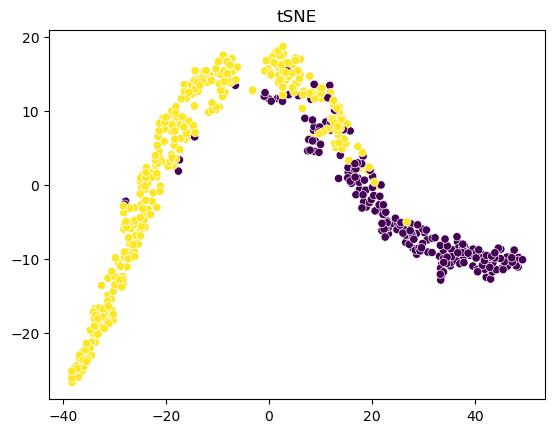

In [ ]:
from sklearn.manifold import TSNE

# Perform tSNE on our data using X with n_components=2 and perplexity=30.0
# store the result in x_tsne

x_tsne = ...

# plotting our data. Is there class separation now?
# what if you change the perplexity?
plt.figure()
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], markers='.', c=y)
plt.title("tSNE")

#### Exercise 3.2: Perform a Train/Test Split of your Data

A critical preparation step for supervised machine learning, Train/Test splitting allows us to reserve a "hold-out" Test set which our model will not be trained on. This allows us to determine if our model is <b>overfitting</b> or learning the training dataset too well, preventing it from generalizing to new, unseen data.

<b>Train/Test split at a ratio of 80/20.</b>

In [ ]:
# import the proper function from sklearn and do the train/test split here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = ...

# Afterwards, we apply data normalization so it will work with our ML model
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### Exercise 3.3: Fit a Binary Classification model to your Data, and make predictions.

We will now "fit" our data to a binary classification model. For convenience, we have selected an appropriate model which you may recognize from the slides. However, you don't have to use this one if you think there may be a better one! As always, [dig into the docs](https://scikit-learn.org/1.5/supervised_learning.html)!

Begin by creating your model, which is a class `LogisticRegression`, and then call the `.fit` and `.predict` methods respectively. Refer to the slides for an example of how to do this.

In [ ]:
from sklearn.linear_model import LogisticRegression

# create the model and run model.fit
model = ...

# make predictions y_pred using model.predict
y_pred = ...

#### Exercise 3.4: Evaluate your model performance. How did it do?

You can fit any model to any dataset, but it doesn't mean that it will make correct predictions. That is why we made our "hold-out" set, (`X_test`, `y_test`).

For binary classifications, you can use something called a [confusion matrix](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html). It compares the predicted binary values to the true binary values. The diagonals of the matrix will thus be True Negatives and True Positives, and the anti-diagonals will be False Negatives and False Positives ([more info](https://en.wikipedia.org/wiki/Confusion_matrix)). A good model will have very high values on the diagonals, and very low values on the off-diagonals.

Create the `confusion_matrix` using the imported function, and plot it using `seaborn.heatmap`. What do you see?

<Axes: >

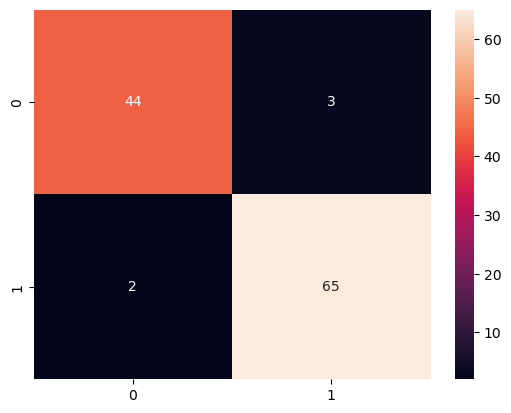

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

# create the confusion matrix
cm = ...

# plot using heatmap
heatmap(cm, annot=True)